# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Grade 8 Math
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

ModuleNotFoundError: No module named 'numpys'

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('/work/20230914-160641/2023-Tutorials-main/data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace = True)


KeyError: ['AVG_READING_7_SCORE']

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8

How many years of data are logged in our dataset? 

In [4]:
categorieslist = []

categorieslist.insert(0,df["YEAR"].iloc[0])
all_rows = list(range(len(df)))
for i in all_rows:
    inThere = False
    for y in categorieslist:
        if (y == df["YEAR"].iloc[i]):
            inThere = True
    if (inThere == False):
        categorieslist.insert(i,df["YEAR"].iloc[i])
print (len(categorieslist))

13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
Michigan_Total = 0
Michigan_Count = 0
Ohio_Total = 0
Ohio_Count = 0

all_rows = list(range(len(df)))
for i in all_rows:
    if (df["STATE"].iloc[i] == "MICHIGAN"):
        Michigan_Total += df["AVG_MATH_8_SCORE"].iloc[i]
        Michigan_Count +=1
    elif (df["STATE"].iloc[i] == "OHIO"):
        Ohio_Total += df["AVG_MATH_8_SCORE"].iloc[i]
        Ohio_Count +=1
print ( Michigan_Total/Michigan_Count)
print (Ohio_Total/Ohio_Count)

276.1666666666667
282.25


Find the average for your outcome score across all states in 2019

In [6]:
States_Total = 0
States_Count = 50

for i in all_rows:
    if (df["YEAR"].iloc[i] == 2019):
        States_Total += df["AVG_MATH_8_SCORE"].iloc[i]
avg_math_8_socre_2019 = States_Total/States_Count
print(avg_math_8_socre_2019) 
    

298.14


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
'''
print(df["STATE"].unique())
allStates = [df["STATE"].unique()]
maximum_score = []

maximum_state_score = 0;
for i in all_rows:
    if (df["STATE"].iloc[i] == allStates[i] && df["AVG_MATH_8_SCORE"].iloc[i] > maximum):
        maximum_state_score = df["AVG_MATH_8_SCORE"].iloc[i]
    maximum_score.insert(i,maximum_state_score)
    maximum_state_score = 0
print(maximum_score)
'''

'\nprint(df["STATE"].unique())\nallStates = [df["STATE"].unique()]\nmaximum_score = []\n\nmaximum_state_score = 0;\nfor i in all_rows:\n    if (df["STATE"].iloc[i] == allStates[i] && df["AVG_MATH_8_SCORE"].iloc[i] > maximum):\n        maximum_state_score = df["AVG_MATH_8_SCORE"].iloc[i]\n    maximum_score.insert(i,maximum_state_score)\n    maximum_state_score = 0\nprint(maximum_score)\n'

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

1) I from the data happened to see a moderate correleation between Total Support Services and AVG_MATH_8_SCORE
2) In addition I believe that if there is a larger INSTRUCTION_EXPENDITURE_PER_STUDENT there will be better AVG_MATH_SCORES as teachers with higher salaries should be more motivated and committed to helping their students as much as possible

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '8th Grade Math Score')

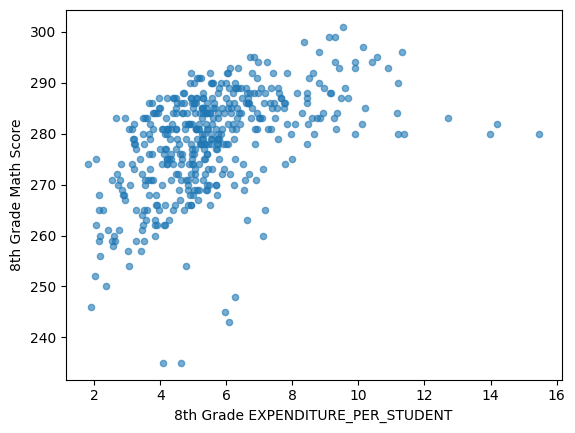

In [9]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

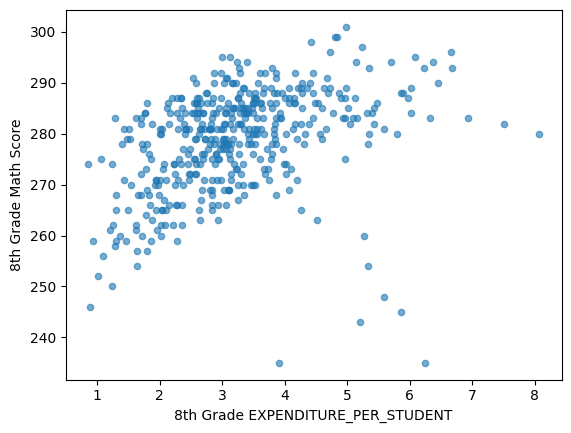

In [10]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Math Score')

# There seems to be a little bit of correlation but as the expendiute_per_student rises so does the outliers

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
 X = df[['ENROLL_8','INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_MATH_8_SCORE']].dropna()
 y = df.loc[X.index] ['AVG_MATH_8_SCORE']

y.fillna(y.median(), inplace = True)

NameError: name 'TRUE' is not defined

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=3)

SyntaxError: invalid syntax (1493094583.py, line 1)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
# import your sklearn class here
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_MATH_8_SCORE']].dropna()
y = df.loc[X.index] ['AVG_MATH_8_SCORE']

y.fillna(y.median(), inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

IndentationError: unexpected indent (600007808.py, line 5)

In [15]:
# create your model here
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [18]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)
np.mean(np.abs(model.predict(X_test)-y_test))

-2.8421709430404007e-13
[-4.67069318e-16  4.44089210e-16  1.00000000e+00]


2.4976653741870188e-14

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

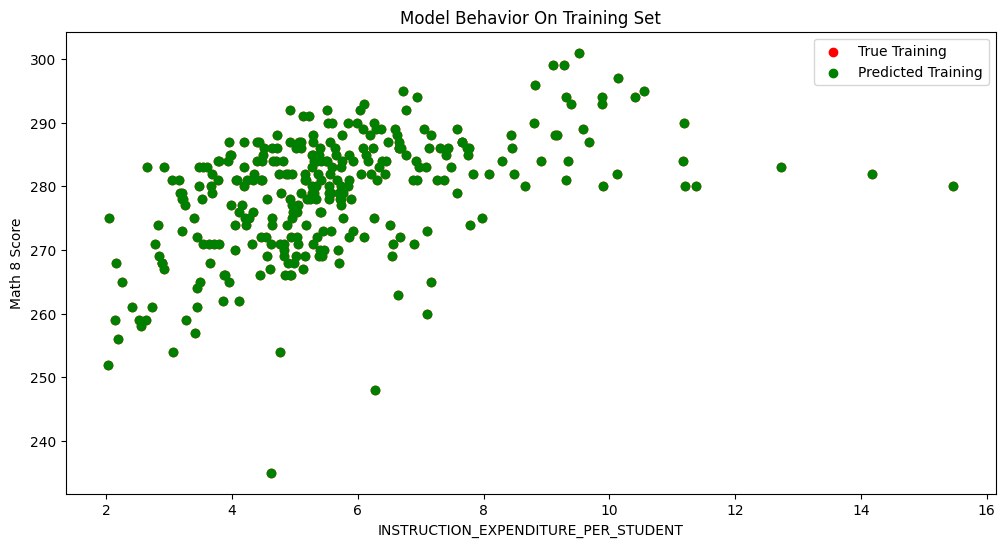

In [19]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

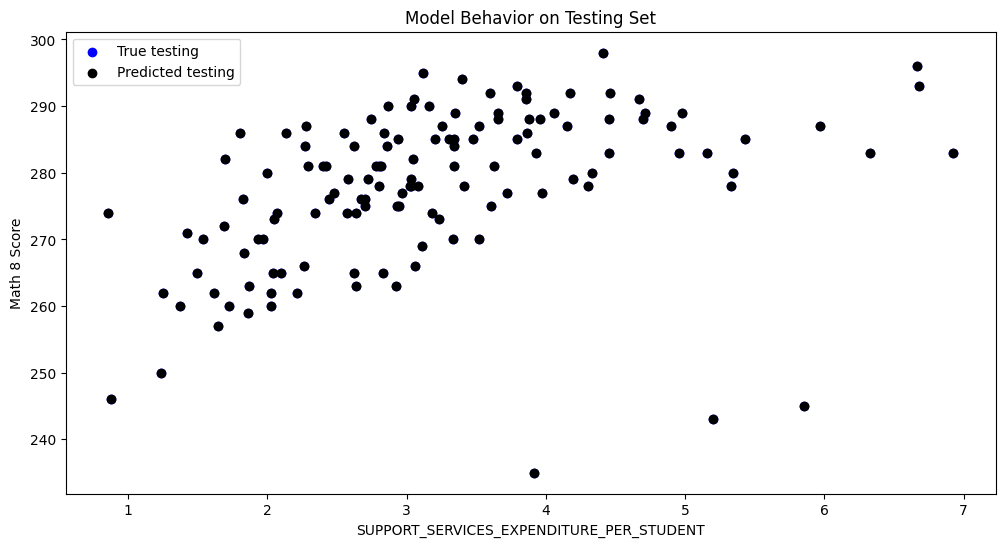

In [20]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

From my findings there seems to be a correlation between SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT and Math 8 Scores, howevever there is not a correlation between Instruction_EXPENDITURE_PER_STUDENT and Math 8 Scores as after a cedrtain amount the test socres start to level off. My model suprisinly had a perfect fit which explains why the blue and red dots cannot be seen. I don't know if my code has an error or if my model is just perfect [which seems very unlikely.]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed5c9242-772d-41cd-a589-ddcda52820bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>